In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [2]:
data = pd.read_csv("wine.data", header=None)

cols = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols",
        "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue",
        "OD280/OD315_of_diluted_wines", "Proline"]

data.columns = cols

data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We don't need a 'y' variable because we are clustering so let's get rid of the 'y' variable 'Class'.

In [3]:
data = data.iloc[:,1:]
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Scale the data
min_max = MinMaxScaler()
X_Scaled = min_max.fit_transform(data)

In [5]:
# Principal Component Analysis
pca = PCA()
X_Scaled_pca = pca.fit_transform(X_Scaled,)
explained_variance = pca.explained_variance_ratio_

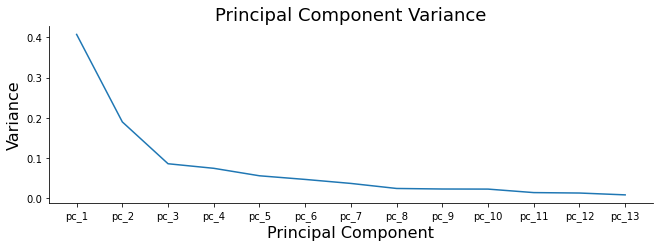

In [6]:
pc = [f"pc_{i+1}" for i in range(len(explained_variance))]
sns.relplot(x=pc, y=explained_variance, kind='line', aspect=3, height=3)
plt.title('Principal Component Variance', size=18)
plt.ylabel('Variance', size=16)
plt.xlabel('Principal Component', size=16)
plt.show()

From the elbow plot, the best number of components is 3.

In [7]:
pca_data = PCA(n_components=3)
X_pca = pca_data.fit_transform(X_Scaled)

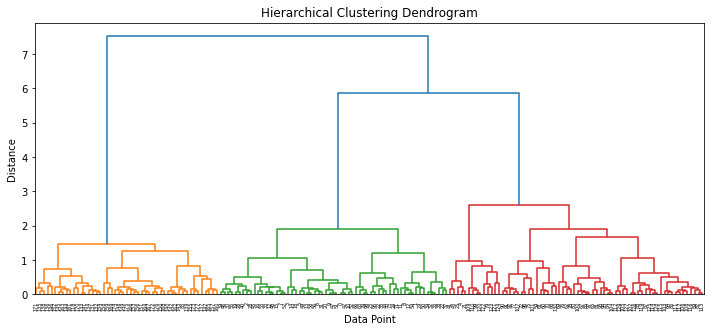

In [8]:
# Dendogram
plt.figure(figsize=(12, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
    
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))

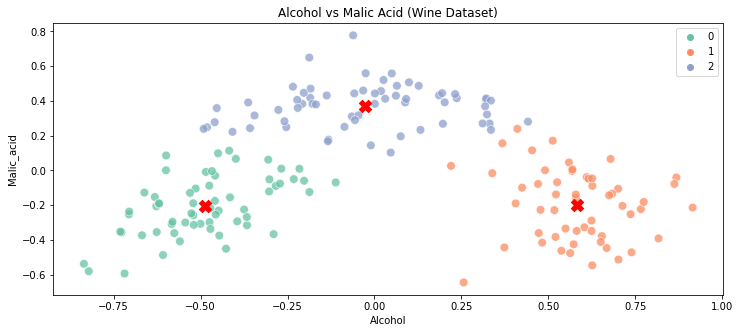

In [9]:
# Kmeans Clustering
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
X = X_Scaled_pca
group = kmeans.fit_predict(X)

df = pd.DataFrame(X)
df.columns = cols[1:]
df["Group"] = group

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.scatterplot(data = df, x=df["Alcohol"], y=df["Malic_acid"], hue="Group", s=75, alpha=0.75, palette="Set2")
ax.set_title("Alcohol vs Malic Acid (Wine Dataset)")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red', marker = 'X')
plt.legend()
plt.show()

Let's tune the number of clusters fro 1 to 5.

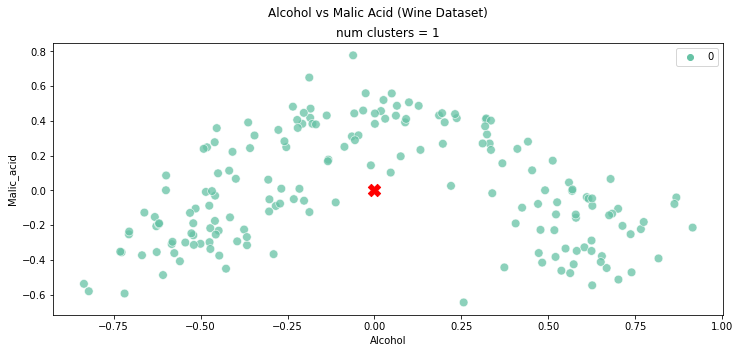

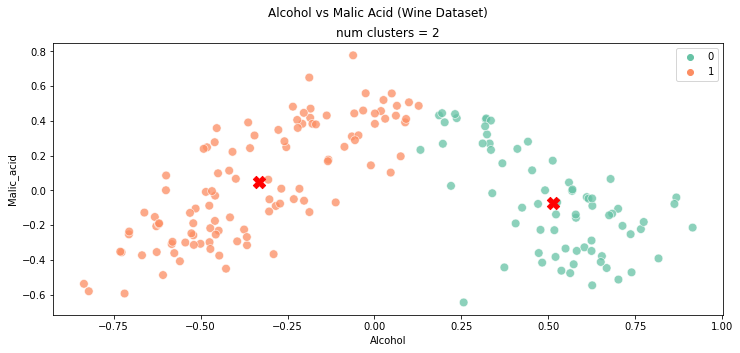

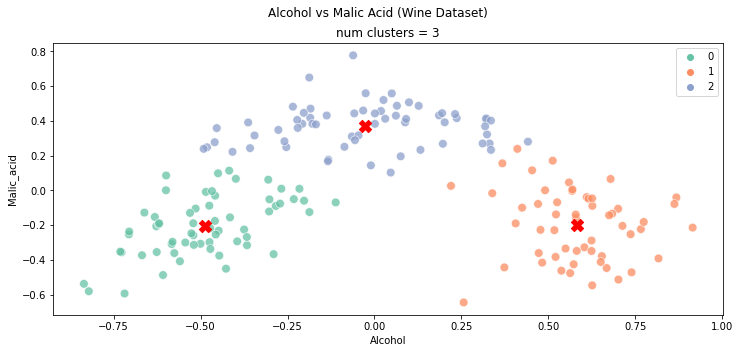

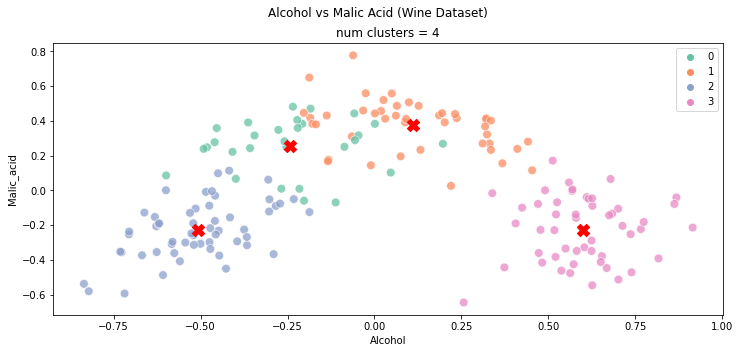

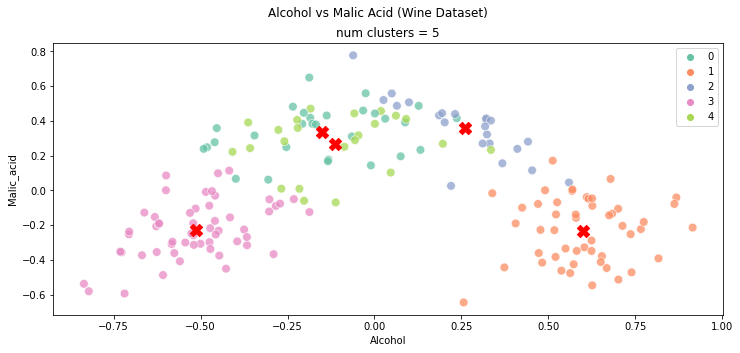

In [10]:
# Tune Number of Clusters
for i in range(1, 6):
    kmeans_ = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    X = X_Scaled_pca
    group = kmeans_.fit_predict(X)

    df = pd.DataFrame(X)
    df.columns = cols[1:]
    df["Group"] = group

    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    sns.scatterplot(data = df, x="Alcohol", y="Malic_acid", hue="Group", s=75, alpha=0.75, palette="Set2")
    plt.suptitle("Alcohol vs Malic Acid (Wine Dataset)")
    plt.title(f"num clusters = {i}")
    plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s = 150, c = 'red', marker = 'X')
    plt.legend()
    plt.show()

We can see that 3 clusters is the optimal number of clusters.

In [11]:
# Using optimal number of clusters, add cluster values to data to be labels
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
X = X_Scaled_pca
group = kmeans.fit_predict(X)
data["Group"] = group

df = pd.DataFrame(X)
df.columns = cols[1:]
df["Group"] = group

We will perform logistic regression to predict the 'Class' variable.

In [12]:
# Logistic Regression
X = min_max.fit_transform(data.iloc[:,:-1])
X = pca.fit_transform(X)
y = data["Group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

Let's tune the cutoff value 'c' and plot the error rates and the corresponding cutoff value 'c'.

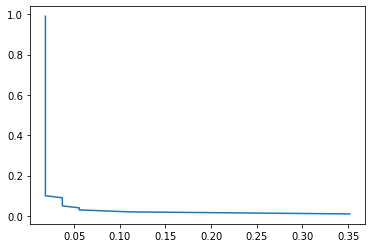

In [13]:
error_rates = []
cs = []
c = 0.01
min_error = 10
best_C = None
while c <= 1:
    clf = LogisticRegression(random_state=0, C=c).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    error_rate = 1 - acc
    error_rates.append(error_rate)
    cs.append(c)
    if error_rate < min_error:
        min_error = error_rate
        best_C = c
        
    c+=0.01

plt.plot(error_rates, cs)
plt.show()

In [14]:
# Use the optimal cut off to compute the accuracy
clf = LogisticRegression(random_state=0, C=best_C).fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9814814814814815

### Conlusion

Yes, the K-Means clustering algorithm found good clusters that can be used for classification. The logistic regression model predicted based on the predictions of the K-Means clustering model. The logistic regression model had an accuraccy rate of 0.98.